# Imports


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Funciones Auxiliares


In [8]:
def time_to_seconds(t):
    """
    Converts a time string in the format hh:mm:ss, mm:ss, mm:ss.xx, or ss.xx to total seconds.

    Args:
        t (str): Time as a string in one of the following formats:
            - 'hh:mm:ss'
            - 'mm:ss'
            - 'mm:ss.xx'
            - 'ss.xx'

    Returns:
        float: Total time in seconds, or None if input is NaN.
    """
    if pd.isna(t):
        return None
    parts = t.split(':')
    if len(parts) == 3:
        hours = int(parts[0])
        minutes = int(parts[1])
        seconds = float(parts[2])
        return hours * 3600 + minutes * 60 + seconds
    elif len(parts) == 2:
        minutes = int(parts[0])
        seconds = float(parts[1])
        return minutes * 60 + seconds
    else:
        return float(t)

# Experimentos

Estos experimentos nos ayudarán a elegir los mejores parámetros del programa HPMoon de cara a poder realizar los estudios posteriores.

## ¿Cuál es el número óptimo de subpoblaciones?

Entre los parámetros del programa HPMoon, uno de los más importantes es el número de subpoblaciones


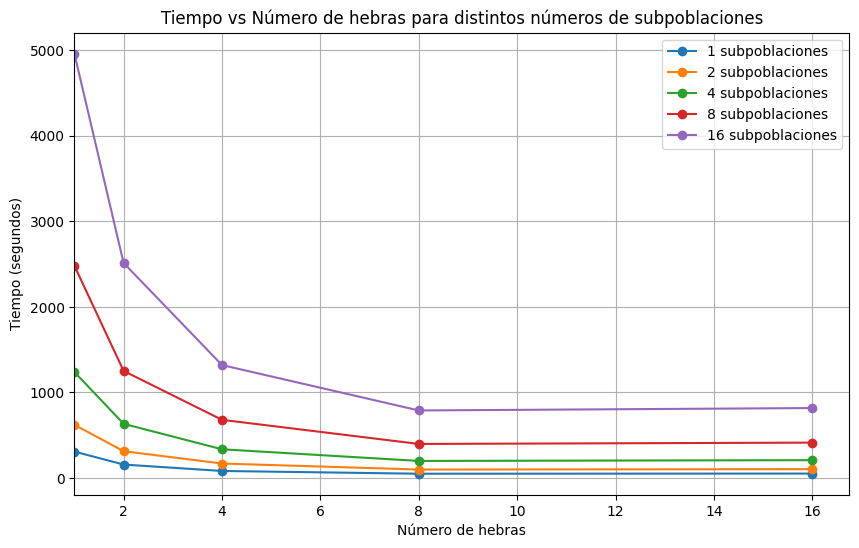

In [ ]:
subpops_list = [1, 2, 4, 8, 16]
plt.figure(figsize=(10, 6))

for n_subpops in subpops_list:
    file_path = f'../results/experiments/ubuntu_native_{n_subpops}subpops.csv'
    try:
        df = pd.read_csv(file_path)
        df['time_seconds'] = df['time'].apply(time_to_seconds)
        plt.plot(df['threads'], df['time_seconds'], marker='o', label=f'{n_subpops} subpoblaciones')
    except FileNotFoundError:
        print(f'Archivo no encontrado: {file_path}')

plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número de hebras para distintos números de subpoblaciones')
plt.legend()
plt.grid(True)
plt.xlim(left=1)  # There is 1 thread at least
plt.show()

In [ ]:
subpops_list = [1, 2, 4, 8, 16]
resultados = []

for n_subpops in subpops_list:
    file_path = f'../results/experiments/ubuntu_native_{n_subpops}subpops.csv'
    try:
        df = pd.read_csv(file_path)
        df['time_seconds'] = df['time'].apply(time_to_seconds)
        for _, row in df.iterrows():
            resultados.append({
                'Subpoblaciones': n_subpops,
                'Hebras': row['threads'],
                'Tiempo (segundos)': row['time_seconds']
            })
    except FileNotFoundError:
        print(f'Archivo no encontrado: {file_path}')

tabla = pd.DataFrame(resultados)
tabla = tabla.sort_values(['Subpoblaciones', 'Hebras']).reset_index(drop=True)
display(tabla)

,Subpoblaciones,Hebras,Tiempo (segundos)
0,1,1,309.43
1,1,2,157.79
2,1,4,82.73
3,1,8,50.58
4,1,16,52.32
5,2,1,622.63
6,2,2,313.86
7,2,4,169.76
8,2,8,99.37
9,2,16,104.06


In [ ]:
subpops_list = [1, 2, 4, 8, 16]
resultados = []

for n_subpops in subpops_list:
    file_path = f'../results/experiments/ubuntu_native_{n_subpops}subpops.csv'
    try:
        df = pd.read_csv(file_path)
        df['time_seconds'] = df['time'].apply(time_to_seconds)
        # Get the base time with 1 thread
        base_time = df[df['threads'] == 1]['time_seconds'].values
        if len(base_time) == 0:
            print(f"No hay datos con 1 hebra para {n_subpops} subpoblaciones")
            continue
        base_time = base_time[0]
        for _, row in df.iterrows():
            var_pct = 100 * (row['time_seconds'] - base_time) / base_time
            resultados.append({
                'Subpoblaciones': n_subpops,
                'Hebras': row['threads'],
                'Tiempo (segundos)': row['time_seconds'],
                'Variación (%)': var_pct
            })
    except FileNotFoundError:
        print(f'Archivo no encontrado: {file_path}')

tabla = pd.DataFrame(resultados)
tabla = tabla.sort_values(['Subpoblaciones', 'Hebras']).reset_index(drop=True)
display(tabla)

# One table per subpopulation
for n_subpops in subpops_list:
    display(tabla[tabla['Subpoblaciones'] == n_subpops][['Hebras', 'Tiempo (segundos)', 'Variación (%)']])

,Subpoblaciones,Hebras,Tiempo (segundos),Variación (%)
0,1,1,309.43,0.000000
1,1,2,157.79,-49.006237
2,1,4,82.73,-73.263743
3,1,8,50.58,-83.653815
4,1,16,52.32,-83.091491
5,2,1,622.63,0.000000
6,2,2,313.86,-49.591250
7,2,4,169.76,-72.735011
8,2,8,99.37,-84.040281
9,2,16,104.06,-83.287024


,Hebras,Tiempo (segundos),Variación (%)
0,1,309.43,0.000000
1,2,157.79,-49.006237
2,4,82.73,-73.263743
3,8,50.58,-83.653815
4,16,52.32,-83.091491


,Hebras,Tiempo (segundos),Variación (%)
5,1,622.63,0.000000
6,2,313.86,-49.591250
7,4,169.76,-72.735011
8,8,99.37,-84.040281
9,16,104.06,-83.287024


,Hebras,Tiempo (segundos),Variación (%)
10,1,1239.73,0.000000
11,2,633.66,-48.887258
12,4,336.25,-72.877159
13,8,200.01,-83.866648
14,16,209.17,-83.127778


,Hebras,Tiempo (segundos),Variación (%)
15,1,2481.89,0.000000
16,2,1252.12,-49.549738
17,4,680.46,-72.582991
18,8,398.66,-83.937241
19,16,414.11,-83.314732


,Hebras,Tiempo (segundos),Variación (%)
20,1,4960.00,0.000000
21,2,2513.72,-49.320161
22,4,1320.66,-73.373790
23,8,790.04,-84.071774
24,16,818.17,-83.504637


In [18]:
tabla_pivot = tabla.pivot(index='Hebras', columns='Subpoblaciones', values='Variación (%)')
display(tabla_pivot)

Subpoblaciones,1,2,4,8,16
Hebras,,,,,
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,-49.006237,-49.591250,-48.887258,-49.549738,-49.320161
4,-73.263743,-72.735011,-72.877159,-72.582991,-73.373790
8,-83.653815,-84.040281,-83.866648,-83.937241,-84.071774
16,-83.091491,-83.287024,-83.127778,-83.314732,-83.504637


**Óptimo con 8 hebras:** Cuando se utilizan 8 subpoblaciones y 8 hebras, cada hebra puede encargarse de una subpoblación, lo que permite aprovechar todos los núcleos físicos del sistema sin generar sobrecarga adicional.

**Caída de rendimiento al aumentar las hebras:** Si se incrementa el número de hebras a 16 manteniendo 8 subpoblaciones, solo 8 hebras estarán activamente trabajando, mientras que las restantes permanecerán ociosas. Esto puede provocar overhead y contención de recursos, reduciendo la eficiencia.

**Recomendación:** Es recomendable igualar el número de hebras al de subpoblaciones y, si es posible, al número de núcleos físicos del sistema.

En el dispositivo utilizado (Lenovo Legion 5 15ARH05H), no se observan mejoras significativas en el rendimiento al aumentar el número de hebras más allá de 8.


## ¿Cuál es el número óptimo de hebras?


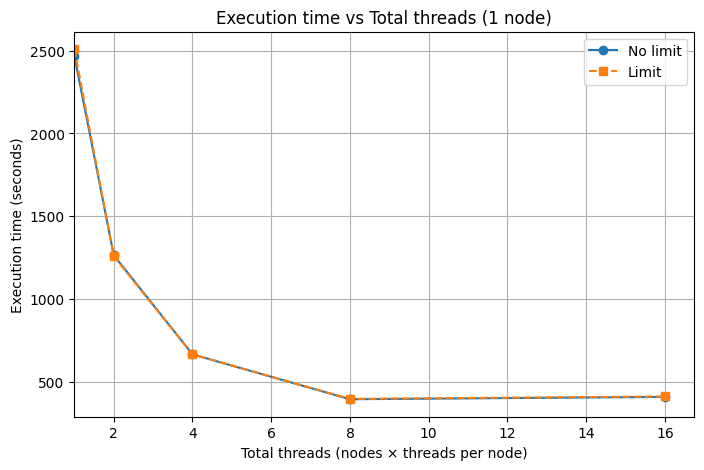

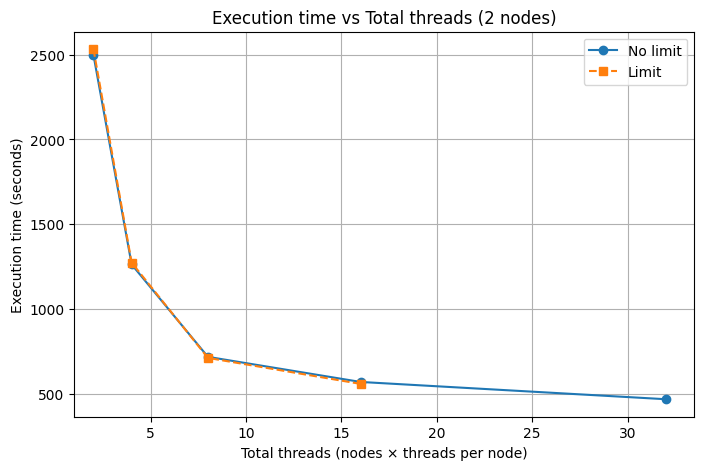

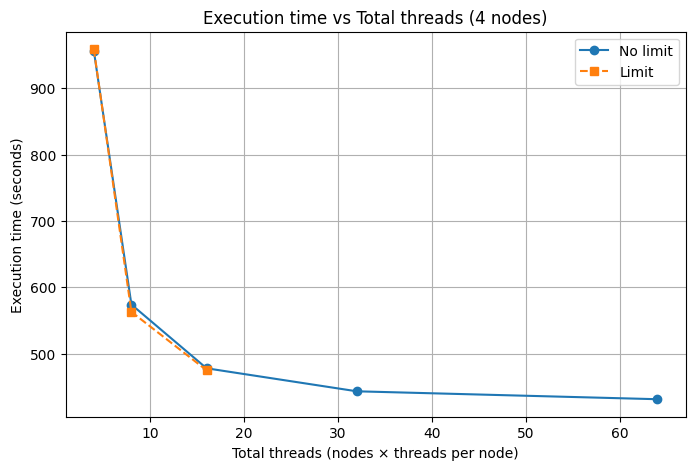

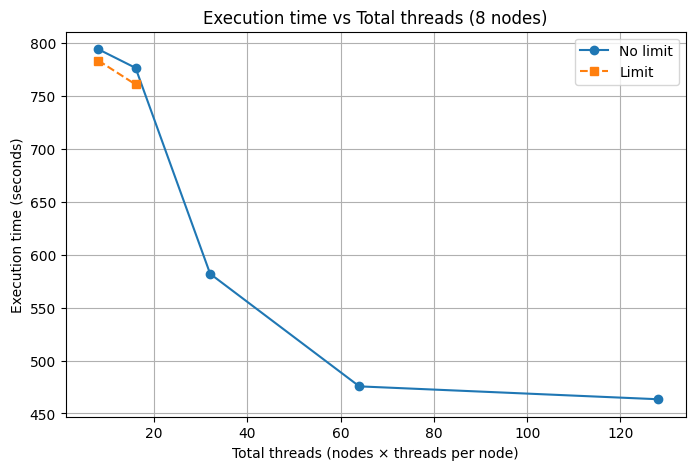

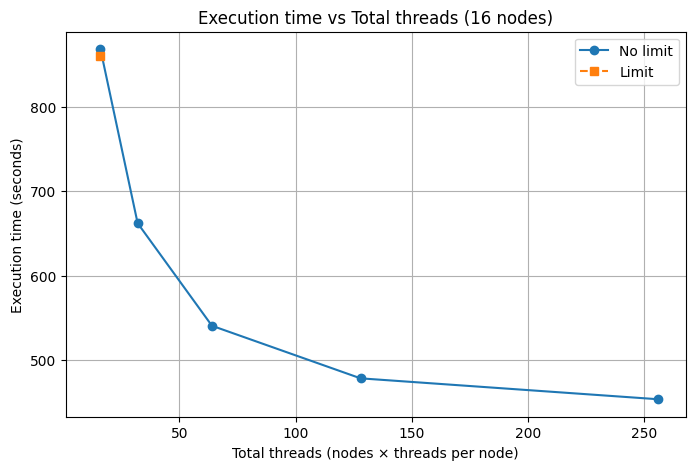

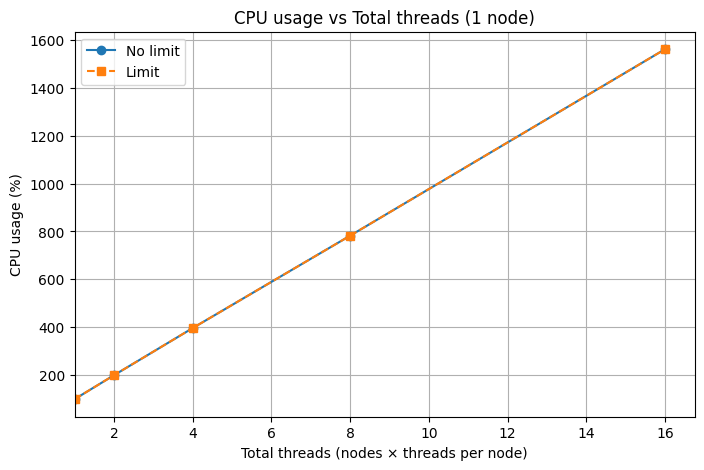

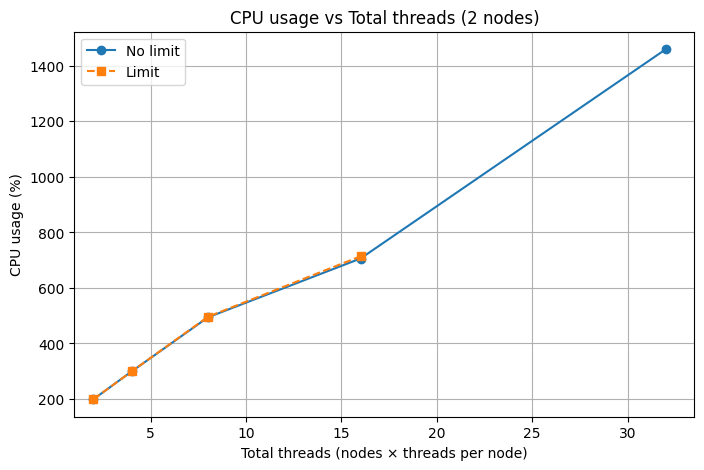

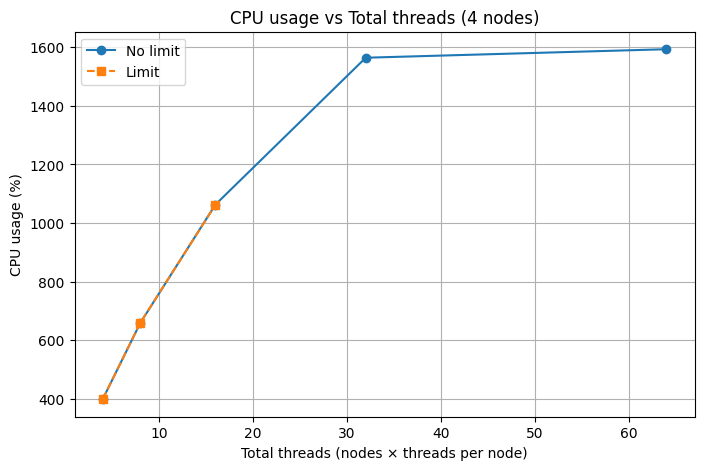

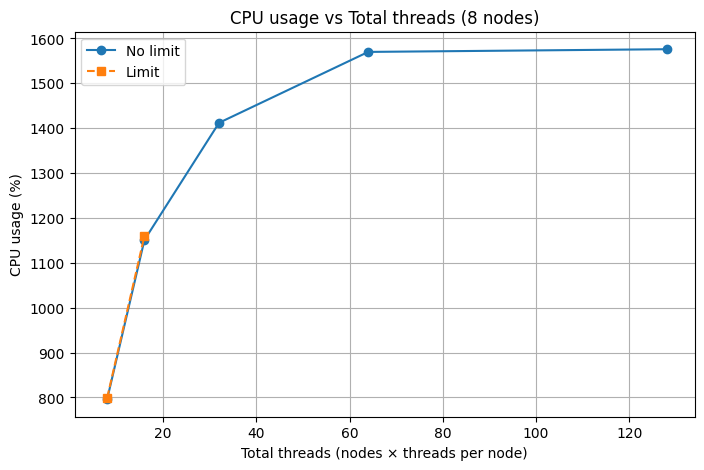

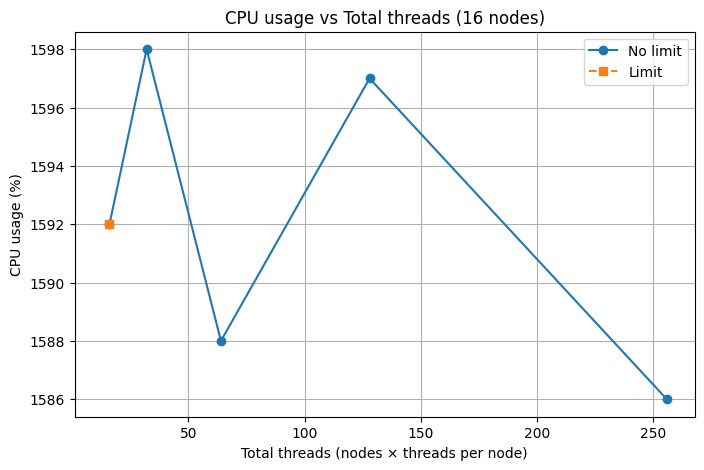

In [21]:
# Load CSVs
df_no_limit = pd.read_csv('../results/experiments/ubuntu_native_no-limit.csv')
df_limit = pd.read_csv('../results/experiments/ubuntu_native_limit.csv')

# Convert time column to seconds using the provided helper function
df_no_limit['time_seconds'] = df_no_limit['time'].apply(time_to_seconds)
df_limit['time_seconds'] = df_limit['time'].apply(time_to_seconds)

# Compute total threads (nodes × threads per node)
df_no_limit['total_threads'] = df_no_limit['nodes'] * df_no_limit['threads']
df_limit['total_threads'] = df_limit['nodes'] * df_limit['threads']

# Plot: Execution time vs total threads, grouped by number of nodes
for n_nodes in sorted(df_no_limit['nodes'].unique()):
    plt.figure(figsize=(8, 5))
    # Filter for current number of nodes
    df_no = df_no_limit[df_no_limit['nodes'] == n_nodes]
    df_lim = df_limit[df_limit['nodes'] == n_nodes]
    plt.plot(df_no['total_threads'], df_no['time_seconds'], 'o-', label='No limit')
    plt.plot(df_lim['total_threads'], df_lim['time_seconds'], 's--', label='Limit')
    plt.xlabel('Total threads (nodes × threads per node)')
    plt.ylabel('Execution time (seconds)')
    plt.title(f'Execution time vs Total threads ({n_nodes} node{"s" if n_nodes > 1 else ""})')
    plt.legend()
    plt.grid(True)
    plt.xlim(left=1)
    plt.show()

# Plot: CPU usage vs total threads, grouped by number of nodes
for n_nodes in sorted(df_no_limit['nodes'].unique()):
    plt.figure(figsize=(8, 5))
    df_no = df_no_limit[df_no_limit['nodes'] == n_nodes]
    df_lim = df_limit[df_limit['nodes'] == n_nodes]
    plt.plot(df_no['total_threads'], df_no['cpu_percentage'], 'o-', label='No limit')
    plt.plot(df_lim['total_threads'], df_lim['cpu_percentage'], 's--', label='Limit')
    plt.xlabel('Total threads (nodes × threads per node)')
    plt.ylabel('CPU usage (%)')
    plt.title(f'CPU usage vs Total threads ({n_nodes} node{"s" if n_nodes > 1 else ""})')
    plt.legend()
    plt.grid(True)
    plt.xlim(left=1)
    plt.show()

In [31]:
# Find the 5 best (fastest) results from the no-limit threads experiment

# Sort by execution time (ascending)
sorted_df = df_no_limit.sort_values('time_seconds')

for rank, (_, row) in enumerate(sorted_df.iterrows(), 1):
    total_threads = row['nodes'] * row['threads']
    print(f"{rank}: Nodes: {row['nodes']}, Threads per node: {row['threads']}, Total threads: {total_threads}, Time (s): {row['time_seconds']:.2f}, CPU usage (%): {row['cpu_percentage']:.1f}")

1: Nodes: 1, Threads per node: 8, Total threads: 8, Time (s): 395.63, CPU usage (%): 782.0
2: Nodes: 1, Threads per node: 16, Total threads: 16, Time (s): 409.51, CPU usage (%): 1561.0
3: Nodes: 4, Threads per node: 16, Total threads: 64, Time (s): 431.30, CPU usage (%): 1593.0
4: Nodes: 4, Threads per node: 8, Total threads: 32, Time (s): 443.23, CPU usage (%): 1564.0
5: Nodes: 16, Threads per node: 16, Total threads: 256, Time (s): 453.48, CPU usage (%): 1586.0
6: Nodes: 8, Threads per node: 16, Total threads: 128, Time (s): 463.45, CPU usage (%): 1576.0
7: Nodes: 2, Threads per node: 16, Total threads: 32, Time (s): 469.88, CPU usage (%): 1460.0
8: Nodes: 8, Threads per node: 8, Total threads: 64, Time (s): 475.59, CPU usage (%): 1570.0
9: Nodes: 4, Threads per node: 4, Total threads: 16, Time (s): 477.90, CPU usage (%): 1063.0
10: Nodes: 16, Threads per node: 8, Total threads: 128, Time (s): 478.23, CPU usage (%): 1597.0
11: Nodes: 16, Threads per node: 4, Total threads: 64, Time (

| #   | Nodes | Threads per node | Total threads | Time (s) | CPU usage (%) |
| --- | ----- | ---------------- | ------------- | -------- | ------------- |
| 1   | 1     | 8                | 8             | 395.63   | 782.0         |
| 2   | 1     | 16               | 16            | 409.51   | 1561.0        |
| 3   | 4     | 16               | 64            | 431.30   | 1593.0        |
| 4   | 4     | 8                | 32            | 443.23   | 1564.0        |
| 5   | 16    | 16               | 256           | 453.48   | 1586.0        |
| 6   | 8     | 16               | 128           | 463.45   | 1576.0        |
| 7   | 2     | 16               | 32            | 469.88   | 1460.0        |
| 8   | 8     | 8                | 64            | 475.59   | 1570.0        |
| 9   | 4     | 4                | 16            | 477.90   | 1063.0        |
| 10  | 16    | 8                | 128           | 478.23   | 1597.0        |
| 11  | 16    | 4                | 64            | 540.54   | 1588.0        |
| 12  | 2     | 8                | 16            | 571.65   | 706.0         |
| 13  | 4     | 2                | 8             | 573.94   | 659.0         |
| 14  | 8     | 4                | 32            | 581.91   | 1412.0        |
| 15  | 16    | 2                | 32            | 662.10   | 1598.0        |
| 16  | 1     | 4                | 4             | 666.51   | 396.0         |
| 17  | 2     | 4                | 8             | 719.43   | 494.0         |
| 18  | 8     | 2                | 16            | 776.44   | 1151.0        |
| 19  | 8     | 1                | 8             | 794.09   | 796.0         |
| 20  | 16    | 1                | 16            | 868.28   | 1592.0        |
| 21  | 4     | 1                | 4             | 956.38   | 399.0         |
| 22  | 2     | 2                | 4             | 1263.74  | 299.0         |
| 23  | 1     | 2                | 2             | 1264.94  | 199.0         |
| 24  | 1     | 1                | 1             | 2467.76  | 99.0          |
| 25  | 2     | 1                | 2             | 2497.06  | 199.0         |


A partir del análisis de la tabla, se pueden extraer las siguientes conclusiones técnicas:

- El mejor rendimiento se alcanza al emplear un menor número de nodos y un mayor número de hebras por nodo, siendo la configuración óptima la de 1 nodo y 8 hebras.
- Aunque el límite físico de hebras de la CPU es de 16, se observa que, entre los 10 mejores resultados, solo 3 respetan este límite. En los demás casos, incrementar el número de hebras más allá de la capacidad física de la CPU sigue proporcionando mejoras en el rendimiento. Este comportamiento, aunque inicialmente contraintuitivo, puede explicarse analizando el uso efectivo de la CPU.
- El porcentaje de uso de CPU refleja el grado de aprovechamiento de las hebras disponibles. Por ejemplo, con 1 hebra el uso máximo es 100%, con 2 hebras es 200%, y así sucesivamente, hasta un máximo teórico de 1600% (16 hebras × 100%). En configuraciones con un único nodo, el incremento en el número de hebras se traduce en un aumento proporcional del uso de CPU:

| #   | Nodos | Hebras por nodo | Hebras totales | Tiempo (s) | Uso CPU (%) |
| --- | ----- | --------------- | -------------- | ---------- | ----------- |
| 1   | 1     | 8               | 8              | 395.63     | 782.0       |
| 2   | 1     | 16              | 16             | 409.51     | 1561.0      |
| 16  | 1     | 4               | 4              | 666.51     | 396.0       |
| 23  | 1     | 2               | 2              | 1264.94    | 199.0       |
| 24  | 1     | 1               | 1              | 2467.76    | 99.0        |

- En contraste, cuando el número total de hebras se distribuye entre varios nodos (incluso si no se supera el límite físico de la CPU), el rendimiento no mejora de la misma manera. Esto se debe a la sobrecarga asociada a la gestión de múltiples nodos, que puede contrarrestar los beneficios de disponer de más hebras. En estos casos, el uso de CPU no alcanza los valores esperados, resultando en un rendimiento inferior respecto a configuraciones mononodo equivalentes:

| #   | Nodos | Hebras por nodo | Hebras totales | Tiempo (s) | Uso CPU (%) |
| --- | ----- | --------------- | -------------- | ---------- | ----------- |
| 9   | 4     | 4               | 16             | 477.90     | 1063.0      |
| 12  | 2     | 8               | 16             | 571.65     | 706.0       |
| 13  | 4     | 2               | 8              | 573.94     | 659.0       |
| 17  | 2     | 4               | 8              | 719.43     | 494.0       |
| 18  | 8     | 2               | 16             | 776.44     | 1151.0      |
| 19  | 8     | 1               | 8              | 794.09     | 796.0       |
| 20  | 16    | 1               | 16             | 868.28     | 1592.0      |
| 21  | 4     | 1               | 4              | 956.38     | 399.0       |
| 22  | 2     | 2               | 4              | 1263.74    | 299.0       |
| 25  | 2     | 1               | 2              | 2497.06    | 199.0       |

- Por tanto, para configuraciones multinodo, es necesario incrementar el número de hebras más allá de la capacidad física de la CPU para acercarse al uso máximo teórico (1600%), lo que explica por qué se obtienen mejores resultados bajo estas condiciones.


Si se analiza el rendimiento manteniendo constante el número total de hebras, se observa que las configuraciones con un único nodo presentan sistemáticamente los mejores tiempos de ejecución. Esto indica que, para un mismo grado de paralelismo, la distribución de hebras en un solo nodo minimiza la sobrecarga de comunicación y sincronización asociada al entorno multinodo.

### 16 hebras

| #   | Nodes | Threads per node | Total threads | Time (s) | CPU usage (%) |
| --- | ----- | ---------------- | ------------- | -------- | ------------- |
| 2   | 1     | 16               | 16            | 409.51   | 1561.0        |
| 9   | 4     | 4                | 16            | 477.90   | 1063.0        |
| 12  | 2     | 8                | 16            | 571.65   | 706.0         |
| 18  | 8     | 2                | 16            | 776.44   | 1151.0        |
| 20  | 16    | 1                | 16            | 868.28   | 1592.0        |

### 8 hebras

| #   | Nodes | Threads per node | Total threads | Time (s) | CPU usage (%) |
| --- | ----- | ---------------- | ------------- | -------- | ------------- |
| 1   | 1     | 8                | 8             | 395.63   | 782.0         |
| 13  | 4     | 2                | 8             | 573.94   | 659.0         |
| 17  | 2     | 4                | 8             | 719.43   | 494.0         |
| 19  | 8     | 1                | 8             | 794.09   | 796.0         |

### 4 hebras

| #   | Nodes | Threads per node | Total threads | Time (s) | CPU usage (%) |
| --- | ----- | ---------------- | ------------- | -------- | ------------- |
| 16  | 1     | 4                | 4             | 666.51   | 396.0         |
| 21  | 4     | 1                | 4             | 956.38   | 399.0         |
| 22  | 2     | 2                | 4             | 1263.74  | 299.0         |

### 2 hebras

| #   | Nodes | Threads per node | Total threads | Time (s) | CPU usage (%) |
| --- | ----- | ---------------- | ------------- | -------- | ------------- |
| 23  | 1     | 2                | 2             | 1264.94  | 199.0         |
| 25  | 2     | 1                | 2             | 2497.06  | 199.0         |

### 1 hebra

| #   | Nodes | Threads per node | Total threads | Time (s) | CPU usage (%) |
| --- | ----- | ---------------- | ------------- | -------- | ------------- |
| 24  | 1     | 1                | 1             | 2467.76  | 99.0          |

En general, se aprecia que, para un mismo número de hebras, el rendimiento mejora al reducir el número de nodos, lo que confirma el impacto negativo de la sobrecarga multinodo. Una excepción a esta tendencia se observa en el caso de 2 y 4 nodos con 4 hebras, donde la configuración de 4 nodos supera en rendimiento a la de 2 nodos, invirtiendo el orden esperado.


## Conclusiones

A partir de los experimentos realizados, se extraen las siguientes conclusiones técnicas relevantes para futuros estudios:

- **Número de subpoblaciones:** Se selecciona 8 subpoblaciones como valor óptimo, ya que maximiza el rendimiento observado. Utilizar menos subpoblaciones implica un aprovechamiento subóptimo de los recursos de cómputo, mientras que aumentar el número no aporta mejoras significativas, evidenciando que el sistema alcanza su máximo rendimiento con 8 subpoblaciones.

- **Número de hebras:** El incremento del número de hebras no garantiza una mejora continua del rendimiento, especialmente cuando se mantiene el número de hebras, pero estas se reparten en más nodos. El mejor resultado se obtiene con una configuración de 1 nodo y 8 hebras, coincidiendo con el número de núcleos físicos del sistema.

- **Diferencia porcentual de rendimiento:** La diferencia de tiempo de ejecución entre la configuración óptima (1 nodo, 8 hebras) y la de 1 nodo y 16 hebras es:

  $$
  \text{Diferencia (\%)} = \frac{409.51 - 395.63}{395.63} \times 100 = 3.51\%
  $$

  Por tanto, ejecutar con 1 nodo y 16 hebras resulta aproximadamente un **3.5% más lento** que con 1 nodo y 8 hebras.

- **Criterio para los estudios comparativos:** Dado que el objetivo principal es comparar la conservación del rendimiento entre la ejecución nativa y la ejecución en contenedores, y no la búsqueda del óptimo absoluto, se realizarán los experimentos mononodo hasta 16 hebras.

- **Escalabilidad multinodo:** Para el análisis multinodo, se mantendrá el criterio de comparar el rendimiento observado en la ejecución nativa, explorando configuraciones de hasta 16 nodos y 16 hebras, asegurando así una evaluación completa de la escalabilidad y la equivalencia de rendimiento entre ambos entornos.


# Escalabilidad Mononodo


## Nativo: Subpopulations Fijo vs Subpopulations Variable


In [10]:
# Load CSVs
df_single_node_ubuntu_native_fixed = pd.read_csv('../results/scalability_single-node_native_subpop-fixed.csv')
df_single_node_ubuntu_native_variable = pd.read_csv('../results/scalability_single-node_native_subpop-variable.csv')

# Convert time columns to seconds
df_single_node_ubuntu_native_fixed['time_seconds'] = df_single_node_ubuntu_native_fixed['time'].apply(time_to_seconds)
df_single_node_ubuntu_native_variable['time_seconds'] = df_single_node_ubuntu_native_variable['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_single_node_ubuntu_native_fixed['threads'], df_single_node_ubuntu_native_fixed['time_seconds'], marker='o', label='Nativo Fijo')
plt.plot(df_single_node_ubuntu_native_variable['threads'], df_single_node_ubuntu_native_variable['time_seconds'], marker='s', label='Nativo Variable')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Comparativa: Tiempo vs Número de hebras')
plt.legend()
plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../results/scalability_single-node_native_subpop-fixed.csv'

## Nativo: Tiempo de ejecución vs Número de hebras


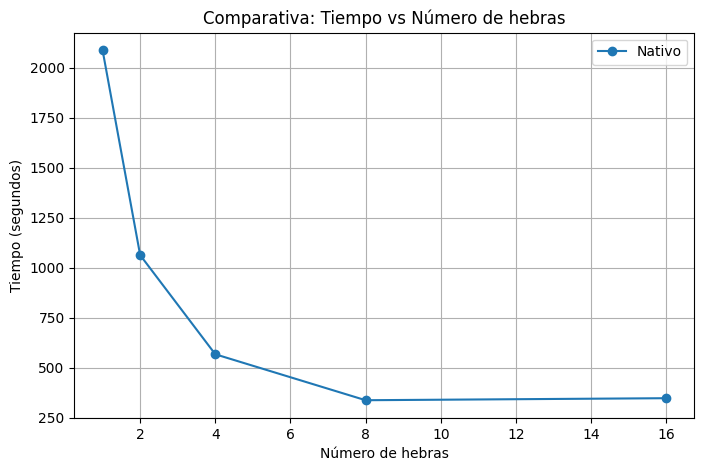

In [ ]:
# Load CSVs
df_single_node_ubuntu_native = pd.read_csv('../results/single-node_ubuntu_native.csv')

# Convert time columns to seconds
df_single_node_ubuntu_native['time_seconds'] = df_single_node_ubuntu_native['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_single_node_ubuntu_native['threads'], df_single_node_ubuntu_native['time_seconds'], marker='o', label='Nativo')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Comparativa: Tiempo vs Número de hebras')
plt.legend()
plt.grid(True)
plt.show()

## Nativo: Porcentaje de uso de CPU vs Número de hebras


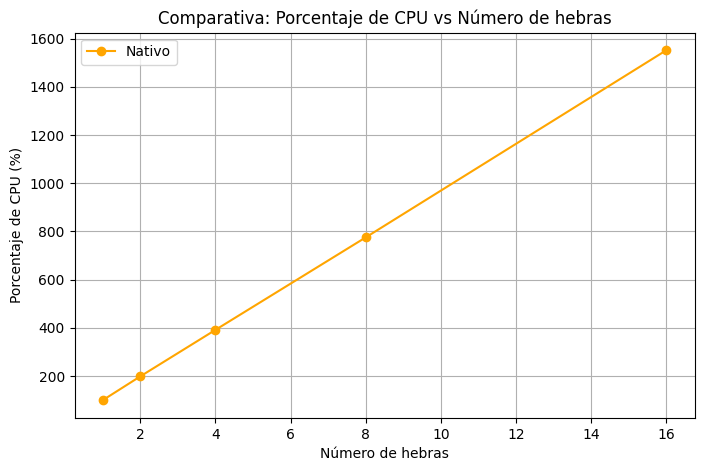

In [ ]:
# Graficar número de hebras vs porcentaje de CPU
plt.figure(figsize=(8, 5))
plt.plot(df_single_node_ubuntu_native['threads'], df_single_node_ubuntu_native['cpu_percentage'], marker='o', color='orange', label='Nativo')
plt.xlabel('Número de hebras')
plt.ylabel('Porcentaje de CPU (%)')
plt.title('Comparativa: Porcentaje de CPU vs Número de hebras')
plt.grid(True)
plt.legend()
plt.show()

## Nativo vs Docker


In [ ]:
# Load CSVs
df_single_node_docker = pd.read_csv('../results/single-node_ubuntu_docker.csv')

# Convert time columns to seconds
df_single_node_ubuntu_native['time_seconds'] = df_single_node_ubuntu_native['time'].apply(time_to_seconds)
df_single_node_docker['time_seconds'] = df_single_node_docker['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_single_node_ubuntu_native['threads'], df_single_node_ubuntu_native['time_seconds'], marker='o', label='Nativo')
plt.plot(df_single_node_docker['threads'], df_single_node_docker['time_seconds'], marker='s', label='Docker')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Comparativa: Tiempo vs Número de hebras')
plt.legend()
plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../results/single-node_ubuntu_docker.csv'

# Escalabilidad Multinodo


## Nativo: Tiempo de Ejecución vs Número de Nodos


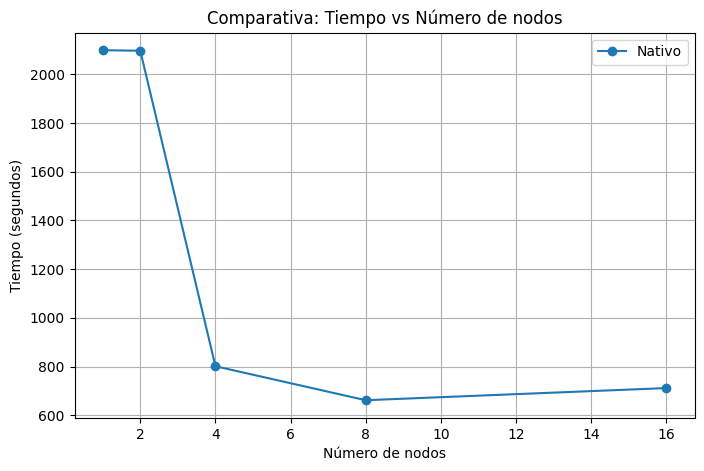

In [ ]:
# Load CSVs
df_multi_node_ubuntu_native = pd.read_csv('../results/multi-node_ubuntu_native.csv')

# Convert time columns to seconds
df_multi_node_ubuntu_native['time_seconds'] = df_multi_node_ubuntu_native['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_multi_node_ubuntu_native['nodes'], df_multi_node_ubuntu_native['time_seconds'], marker='o', label='Nativo')
plt.xlabel('Número de nodos')
plt.ylabel('Tiempo (segundos)')
plt.title('Comparativa: Tiempo vs Número de nodos')
plt.legend()
plt.grid(True)
plt.show()

## Nativo: Porcentaje de uso de CPU vs Número de nodos


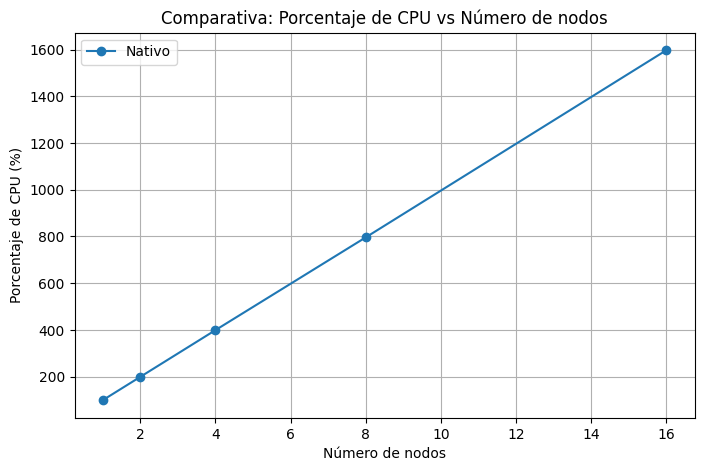

In [ ]:
# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_multi_node_ubuntu_native['nodes'], df_multi_node_ubuntu_native['cpu_percentage'], marker='o', label='Nativo')
plt.xlabel('Número de nodos')
plt.ylabel('Porcentaje de CPU (%)')
plt.title('Comparativa: Porcentaje de CPU vs Número de nodos')
plt.legend()
plt.grid(True)
plt.show()

## Nativo vs Docker


In [ ]:
# Load CSVs
df_multi_node_ubuntu_docker = pd.read_csv('../results/multi-node_ubuntu_docker.csv')

# Convert time columns to seconds
df_multi_node_ubuntu_docker['time_seconds'] = df_multi_node_ubuntu_docker['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_multi_node_ubuntu_docker['nodes'], df_multi_node_ubuntu_docker['time_seconds'], marker='o', label='Nativo')
plt.plot(df_multi_node_ubuntu_docker['nodes'], df_multi_node_ubuntu_docker['time_seconds'], marker='s', label='Docker')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Comparativa: Tiempo vs Número de hebras')
plt.legend()
plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../results/multi-node_ubuntu_docker.csv'

# Escalabilidad Mononodo vs Multinodo


## Ubuntu


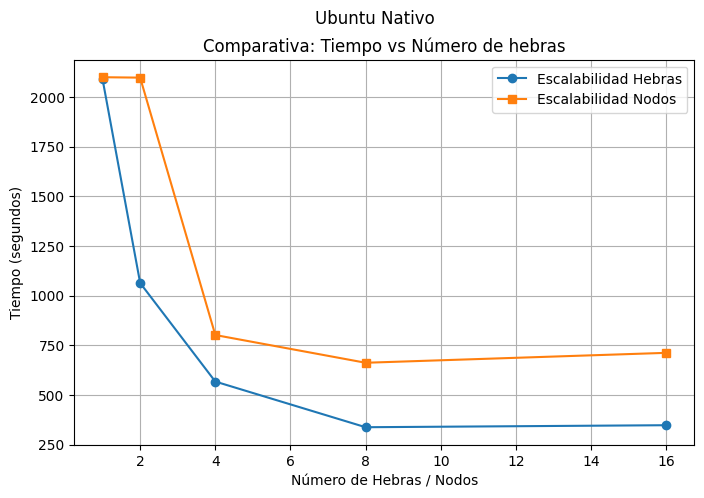

In [ ]:
# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_single_node_ubuntu_native['threads'], df_single_node_ubuntu_native['time_seconds'], marker='o', label='Escalabilidad Hebras')
plt.plot(df_multi_node_ubuntu_native['nodes'], df_multi_node_ubuntu_native['time_seconds'], marker='s', label='Escalabilidad Nodos')
plt.xlabel('Número de Hebras / Nodos')
plt.ylabel('Tiempo (segundos)')
plt.title('Comparativa: Tiempo vs Número de hebras')
plt.suptitle('Ubuntu Nativo')
plt.legend()
plt.grid(True)
plt.show()

# Escalabilidad Multinodo Barrido de Hebras


## Nativo


/tmp/ipykernel_20088/2118896266.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodes_1_native['time_seconds'] = df_nodes_1_native['time'].apply(time_to_seconds)


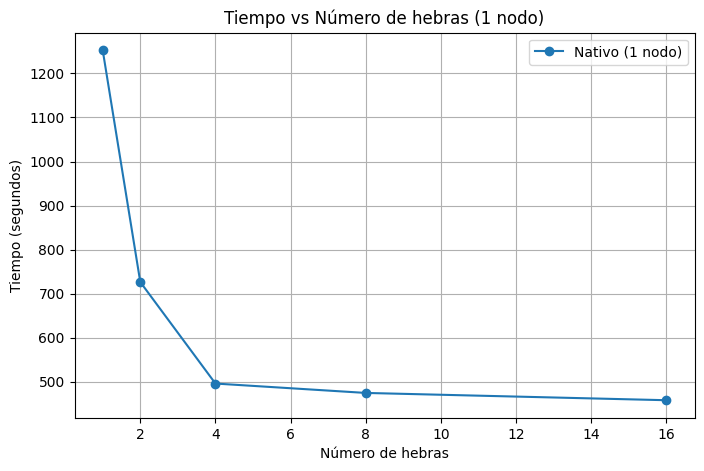

In [ ]:
# Load CSVs
df_multi_node_sweep_threads_native = pd.read_csv('../results/scalability_multi-node_sweep-threads_native.csv')

# Filter to only show rows where nodes == 1
df_nodes_1_native = df_multi_node_sweep_threads_native[df_multi_node_sweep_threads_native['nodes'] == 1]

# Convert time columns to seconds
df_nodes_1_native['time_seconds'] = df_nodes_1_native['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_nodes_1_native['threads'], df_nodes_1_native['time_seconds'], marker='o', label='Nativo (1 nodo)')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número de hebras (1 nodo)')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_20088/1335344604.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodes_2_native['time_seconds'] = df_nodes_2_native['time'].apply(time_to_seconds)


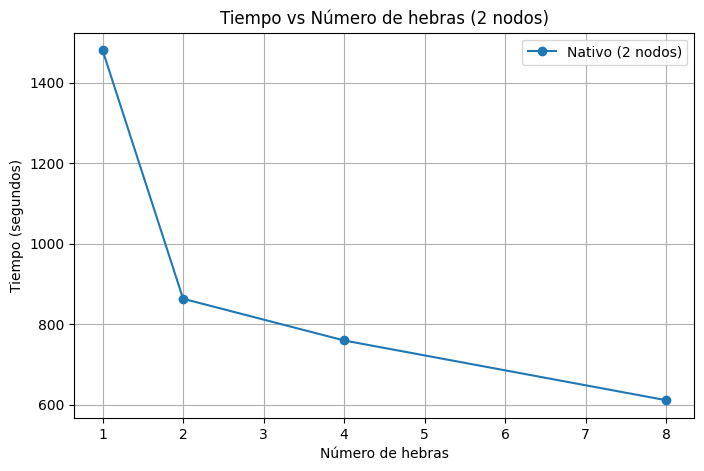

In [ ]:
# Load CSVs
df_multi_node_sweep_threads_native = pd.read_csv('../results/scalability_multi-node_sweep-threads_native.csv')

# Filter to only show rows where nodes == 2
df_nodes_2_native = df_multi_node_sweep_threads_native[df_multi_node_sweep_threads_native['nodes'] == 2]

# Convert time columns to seconds
df_nodes_2_native['time_seconds'] = df_nodes_2_native['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_nodes_2_native['threads'], df_nodes_2_native['time_seconds'], marker='o', label='Nativo (2 nodos)')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número de hebras (2 nodos)')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_48519/430880203.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodes_4['time_seconds'] = df_nodes_4['time'].apply(time_to_seconds)


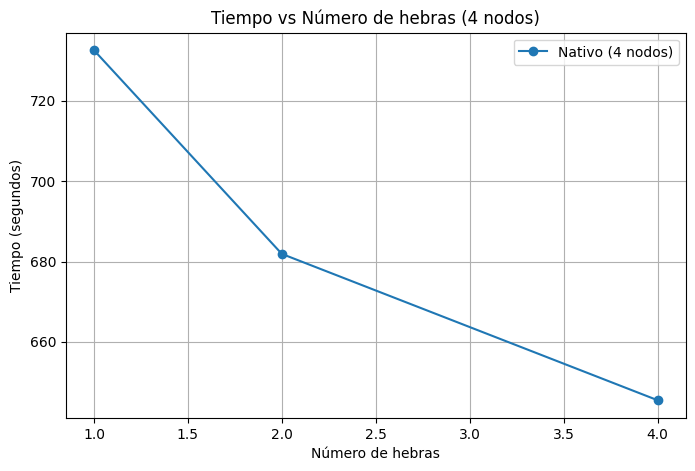

In [ ]:
# Load CSVs
df_multi_node_sweep_threads_native = pd.read_csv('../results/scalability_multi-node_sweep-threads_native.csv')

# Filter to only show rows where nodes == 4
df_nodes_4_native = df_multi_node_sweep_threads_native[df_multi_node_sweep_threads_native['nodes'] == 4]

# Convert time columns to seconds
df_nodes_4_native['time_seconds'] = df_nodes_4_native['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_nodes_4_native['threads'], df_nodes_4_native['time_seconds'], marker='o', label='Nativo (4 nodos)')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número de hebras (4 nodos)')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_48519/3815363275.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodes_8['time_seconds'] = df_nodes_8['time'].apply(time_to_seconds)


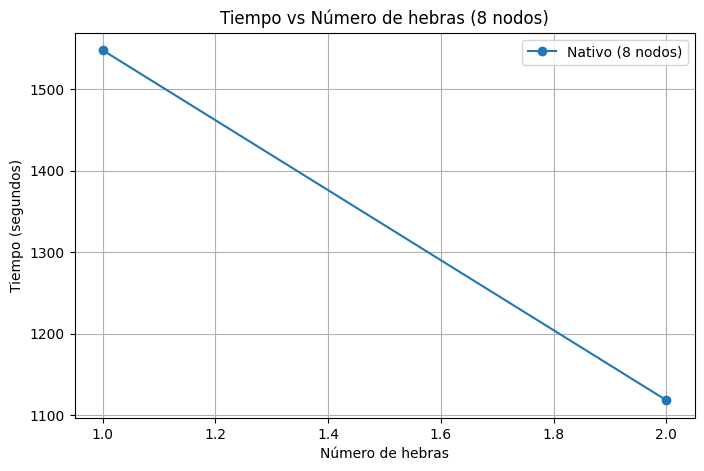

In [ ]:
# Load CSVs
df_multi_node_sweep_threads_native = pd.read_csv('../results/scalability_multi-node_sweep-threads_native.csv')

# Filter to only show rows where nodes == 8
df_nodes_8_native = df_multi_node_sweep_threads_native[df_multi_node_sweep_threads_native['nodes'] == 8]

# Convert time columns to seconds
df_nodes_8_native['time_seconds'] = df_nodes_8_native['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_nodes_8_native['threads'], df_nodes_8_native['time_seconds'], marker='o', label='Nativo (8 nodos)')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número de hebras (8 nodos)')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_48519/2820670796.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodes_16['time_seconds'] = df_nodes_16['time'].apply(time_to_seconds)


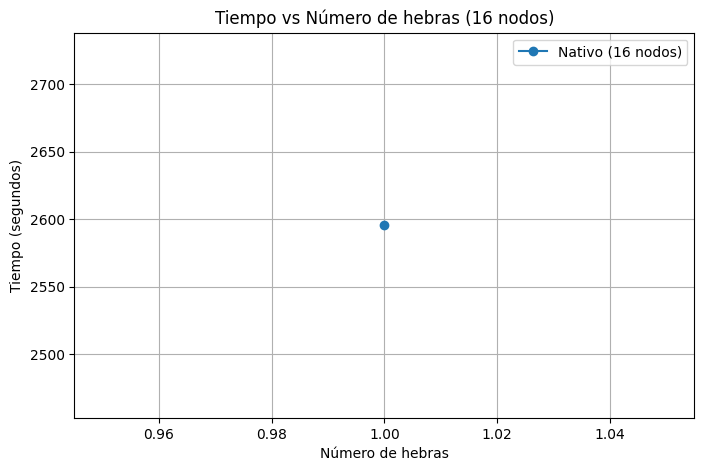

In [ ]:
# Load CSVs
df_multi_node_sweep_threads_native = pd.read_csv('../results/scalability_multi-node_sweep-threads_native.csv')

# Filter to only show rows where nodes == 16
df_nodes_16_native = df_multi_node_sweep_threads_native[df_multi_node_sweep_threads_native['nodes'] == 16]

# Convert time columns to seconds
df_nodes_16_native['time_seconds'] = df_nodes_16_native['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_nodes_16_native['threads'], df_nodes_16_native['time_seconds'], marker='o', label='Nativo (16 nodos)')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número de hebras (16 nodos)')
plt.legend()
plt.grid(True)
plt.show()

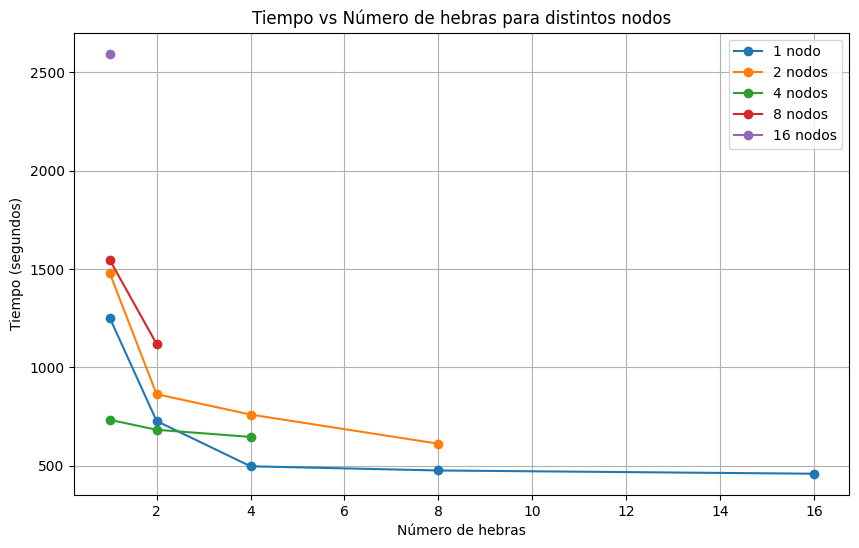

In [ ]:
# Load CSVs
df_multi_node_sweep_threads_native = pd.read_csv('../results/scalability_multi-node_sweep-threads_native.csv')

# Convert time columns to seconds
df_multi_node_sweep_threads_native['time_seconds'] = df_multi_node_sweep_threads_native['time'].apply(time_to_seconds)

# Plotting: compare all nodes (1, 2, 4, 8, 16)
plt.figure(figsize=(10, 6))
for n in [1, 2, 4, 8, 16]:
    df_n = df_multi_node_sweep_threads_native[df_multi_node_sweep_threads_native['nodes'] == n]
    plt.plot(df_n['threads'], df_n['time_seconds'], marker='o', label=f'{n} nodo{"s" if n > 1 else ""}')

plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número de hebras para distintos nodos')
plt.legend()
plt.grid(True)
plt.show()

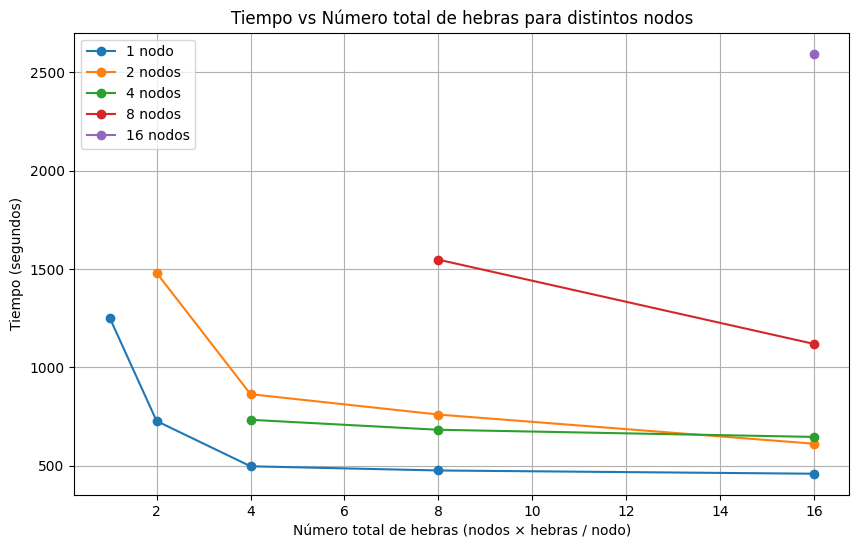

In [ ]:
# Load CSVs
df_multi_node_sweep_threads_native = pd.read_csv('../results/scalability_multi-node_sweep-threads_native.csv')

# Crear columna con el número total de hebras (nodos * hebras)
df_multi_node_sweep_threads_native['total_threads'] = df_multi_node_sweep_threads_native['nodes'] * df_multi_node_sweep_threads_native['threads']

# Convertir columna de tiempo a segundos
df_multi_node_sweep_threads_native['time_seconds'] = df_multi_node_sweep_threads_native['time'].apply(time_to_seconds)

# Graficar: Tiempo vs Número total de hebras, agrupando por nodos
plt.figure(figsize=(10, 6))
for n in [1, 2, 4, 8, 16]:
    df_n = df_multi_node_sweep_threads_native[df_multi_node_sweep_threads_native['nodes'] == n]
    plt.plot(df_n['total_threads'], df_n['time_seconds'], marker='o', label=f'{n} nodo{"s" if n > 1 else ""}')

plt.xlabel('Número total de hebras (nodos × hebras / nodo)')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número total de hebras para distintos nodos')
plt.legend()
plt.grid(True)
plt.show()

## Docker


/tmp/ipykernel_48519/3776711903.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodes_1_docker['time_seconds'] = df_nodes_1_docker['time'].apply(time_to_seconds)


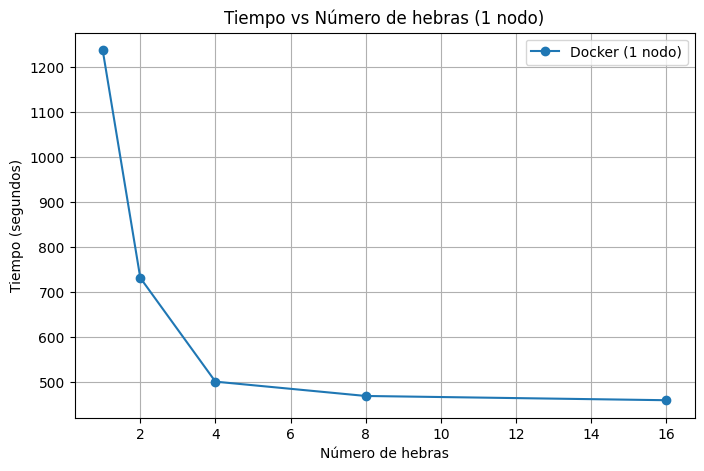

In [ ]:
# Load CSVs
df_multi_node_sweep_threads_docker = pd.read_csv('../results/scalability_multi-node_sweep-threads_docker.csv')

# Filter to only show rows where nodes == 1
df_nodes_1_docker = df_multi_node_sweep_threads_docker[df_multi_node_sweep_threads_docker['nodes'] == 1]

# Convert time columns to seconds
df_nodes_1_docker['time_seconds'] = df_nodes_1_docker['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_nodes_1_docker['threads'], df_nodes_1_docker['time_seconds'], marker='o', label='Docker (1 nodo)')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número de hebras (1 nodo)')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_48519/3099732139.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodes_2_docker['time_seconds'] = df_nodes_2_docker['time'].apply(time_to_seconds)


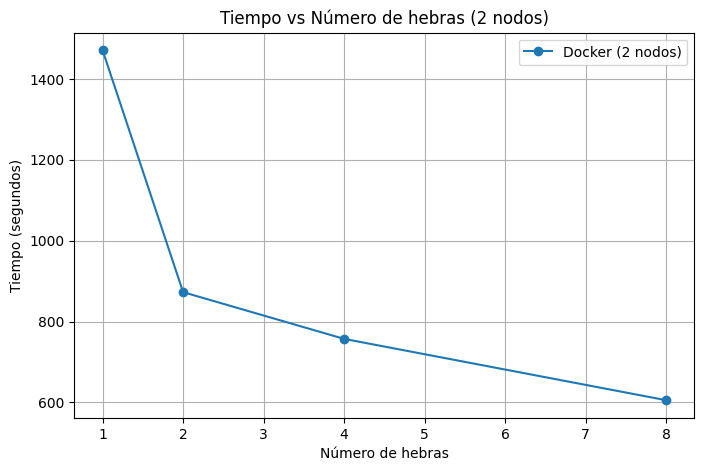

In [ ]:
# Load CSVs
df_multi_node_sweep_threads_docker = pd.read_csv('../results/scalability_multi-node_sweep-threads_docker.csv')

# Filter to only show rows where nodes == 2
df_nodes_2_docker = df_multi_node_sweep_threads_docker[df_multi_node_sweep_threads_docker['nodes'] == 2]

# Convert time columns to seconds
df_nodes_2_docker['time_seconds'] = df_nodes_2_docker['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_nodes_2_docker['threads'], df_nodes_2_docker['time_seconds'], marker='o', label='Docker (2 nodos)')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número de hebras (2 nodos)')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_48519/1548939894.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodes_4_docker['time_seconds'] = df_nodes_4_docker['time'].apply(time_to_seconds)


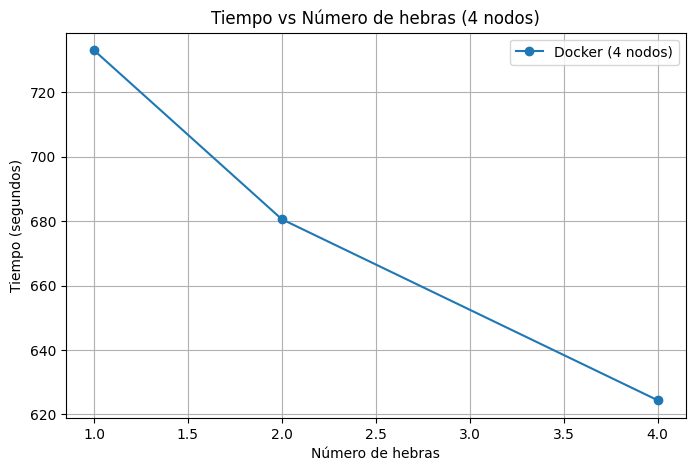

In [ ]:
# Load CSVs
df_multi_node_sweep_threads_docker = pd.read_csv('../results/scalability_multi-node_sweep-threads_docker.csv')

# Filter to only show rows where nodes == 4
df_nodes_4_docker = df_multi_node_sweep_threads_docker[df_multi_node_sweep_threads_docker['nodes'] == 4]

# Convert time columns to seconds
df_nodes_4_docker['time_seconds'] = df_nodes_4_docker['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_nodes_4_docker['threads'], df_nodes_4_docker['time_seconds'], marker='o', label='Docker (4 nodos)')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número de hebras (4 nodos)')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_48519/2037687382.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nodes_8_docker['time_seconds'] = df_nodes_8_docker['time'].apply(time_to_seconds)


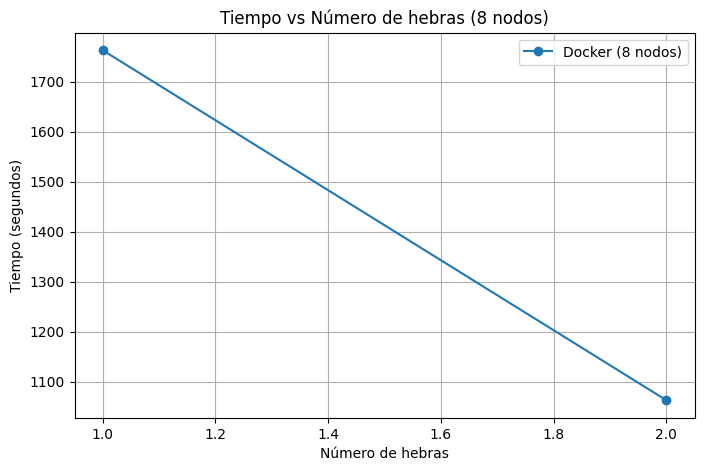

In [ ]:
# Load CSVs
df_multi_node_sweep_threads_docker = pd.read_csv('../results/scalability_multi-node_sweep-threads_docker.csv')

# Filter to only show rows where nodes == 8
df_nodes_8_docker = df_multi_node_sweep_threads_docker[df_multi_node_sweep_threads_docker['nodes'] == 8]

# Convert time columns to seconds
df_nodes_8_docker['time_seconds'] = df_nodes_8_docker['time'].apply(time_to_seconds)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(df_nodes_8_docker['threads'], df_nodes_8_docker['time_seconds'], marker='o', label='Docker (8 nodos)')
plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número de hebras (8 nodos)')
plt.legend()
plt.grid(True)
plt.show()

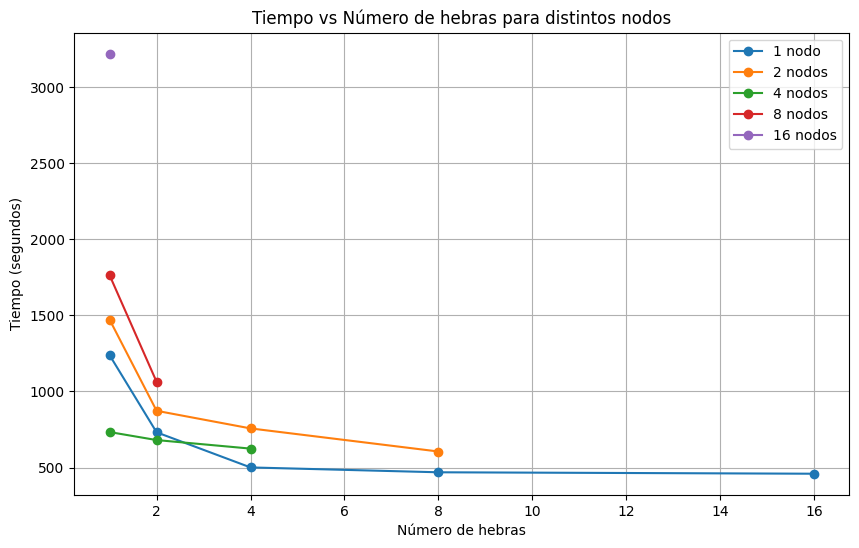

In [ ]:
# Load CSVs
df_multi_node_sweep_threads_docker = pd.read_csv('../results/scalability_multi-node_sweep-threads_docker.csv')

# Convert time columns to seconds
df_multi_node_sweep_threads_docker['time_seconds'] = df_multi_node_sweep_threads_docker['time'].apply(time_to_seconds)

# Plotting: compare all nodes (1, 2, 4, 8, 16)
plt.figure(figsize=(10, 6))
for n in [1, 2, 4, 8, 16]:
    df_n = df_multi_node_sweep_threads_docker[df_multi_node_sweep_threads_docker['nodes'] == n]
    plt.plot(df_n['threads'], df_n['time_seconds'], marker='o', label=f'{n} nodo{"s" if n > 1 else ""}')

plt.xlabel('Número de hebras')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número de hebras para distintos nodos')
plt.legend()
plt.grid(True)
plt.show()

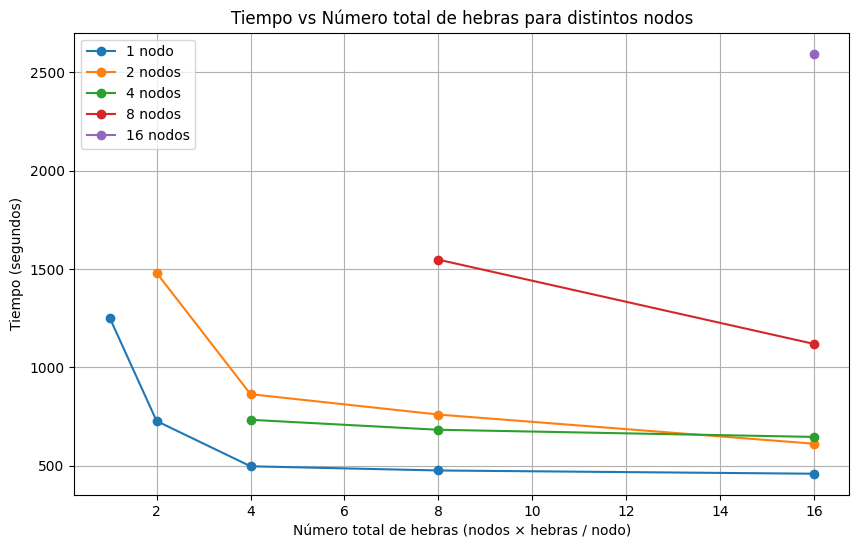

In [ ]:
# Load CSVs
df_multi_node_sweep_threads_docker = pd.read_csv('../results/scalability_multi-node_sweep-threads_native.csv')

# Crear columna con el número total de hebras (nodos * hebras)
df_multi_node_sweep_threads_docker['total_threads'] = df_multi_node_sweep_threads_docker['nodes'] * df_multi_node_sweep_threads_docker['threads']

# Convertir columna de tiempo a segundos
df_multi_node_sweep_threads_docker['time_seconds'] = df_multi_node_sweep_threads_docker['time'].apply(time_to_seconds)

# Graficar: Tiempo vs Número total de hebras, agrupando por nodos
plt.figure(figsize=(10, 6))
for n in [1, 2, 4, 8, 16]:
    df_n = df_multi_node_sweep_threads_docker[df_multi_node_sweep_threads_docker['nodes'] == n]
    plt.plot(df_n['total_threads'], df_n['time_seconds'], marker='o', label=f'{n} nodo{"s" if n > 1 else ""}')

plt.xlabel('Número total de hebras (nodos × hebras / nodo)')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número total de hebras para distintos nodos')
plt.legend()
plt.grid(True)
plt.show()

## Nativo vs Docker


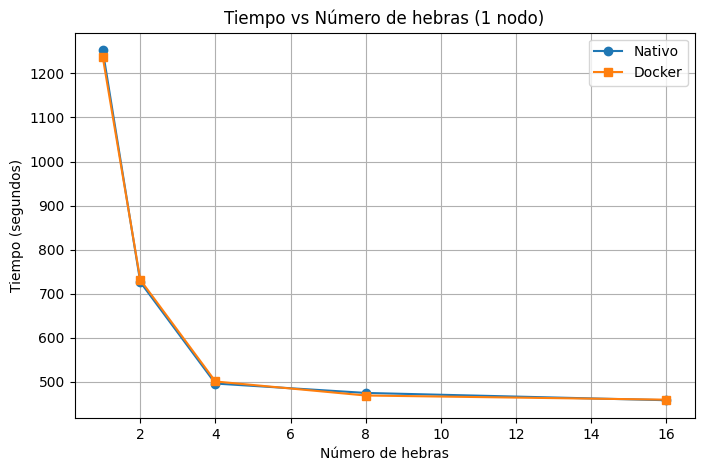

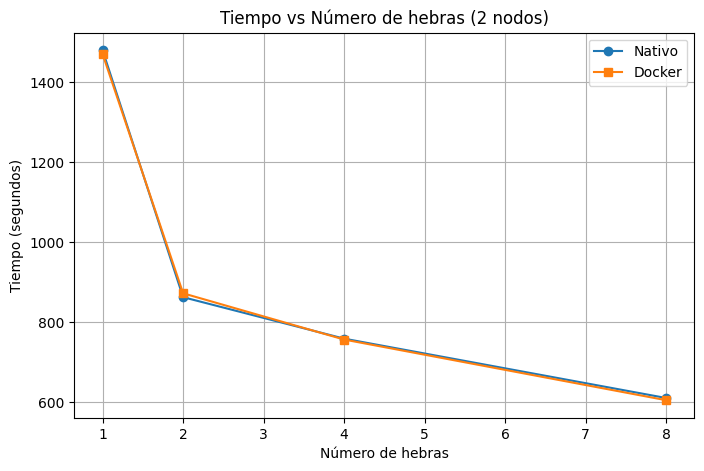

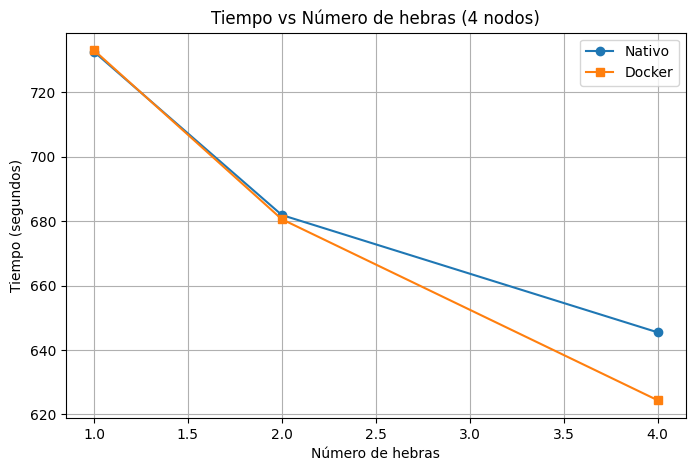

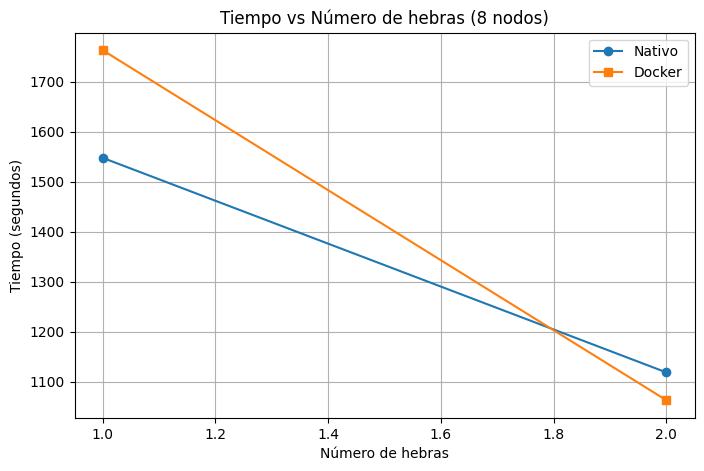

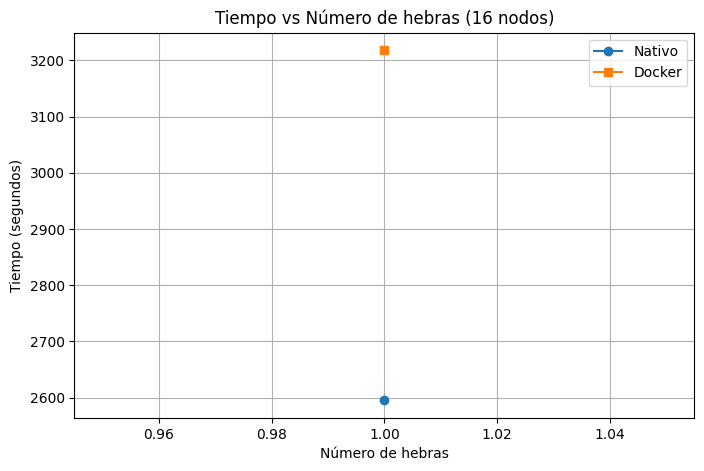

In [ ]:
# Comparación multinodo barrido de hebras: Nativo vs Docker

# Cargar datos
df_multi_node_sweep_threads_native = pd.read_csv('../results/scalability_multi-node_sweep-threads_native.csv')
df_multi_node_sweep_threads_docker = pd.read_csv('../results/scalability_multi-node_sweep-threads_docker.csv')

# Convertir columna de tiempo a segundos
df_multi_node_sweep_threads_native['time_seconds'] = df_multi_node_sweep_threads_native['time'].apply(time_to_seconds)
df_multi_node_sweep_threads_docker['time_seconds'] = df_multi_node_sweep_threads_docker['time'].apply(time_to_seconds)

# Graficar comparación para cada número de nodos
for n in [1, 2, 4, 8, 16]:
    df_n_native = df_multi_node_sweep_threads_native[df_multi_node_sweep_threads_native['nodes'] == n]
    df_n_docker = df_multi_node_sweep_threads_docker[df_multi_node_sweep_threads_docker['nodes'] == n]

    plt.figure(figsize=(8, 5))
    plt.plot(df_n_native['threads'], df_n_native['time_seconds'], marker='o', label='Nativo')
    plt.plot(df_n_docker['threads'], df_n_docker['time_seconds'], marker='s', label='Docker')
    plt.xlabel('Número de hebras')
    plt.ylabel('Tiempo (segundos)')
    plt.title(f'Tiempo vs Número de hebras ({n} nodo{"s" if n > 1 else ""})')
    plt.legend()
    plt.grid(True)
    plt.show()

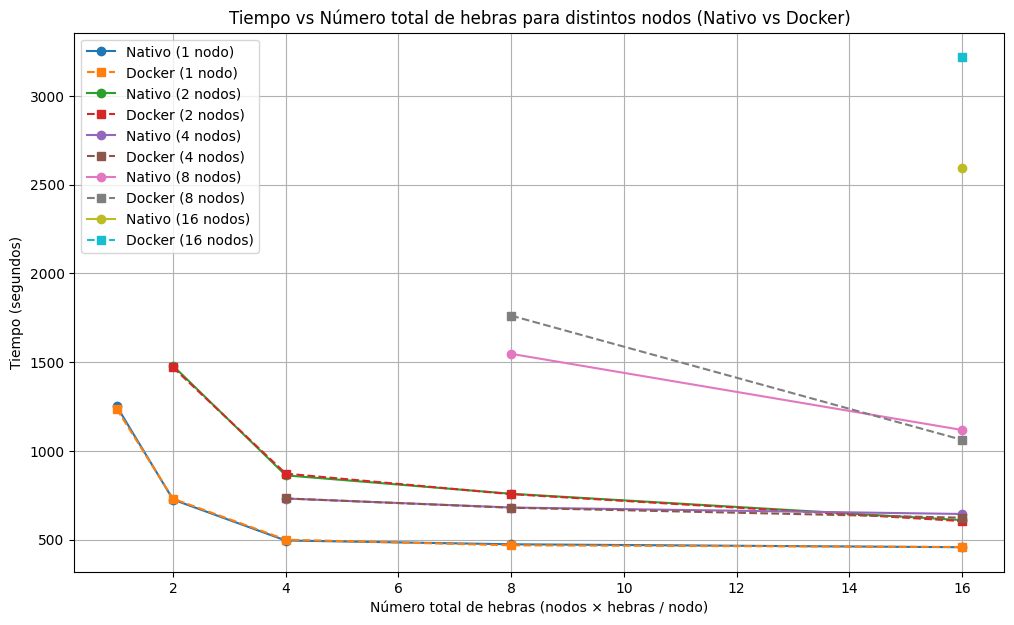

In [ ]:
# Comparación multinodo barrido de hebras: Nativo vs Docker (todas las gráficas juntas, eje x = número total de hebras)

# Cargar datos
df_multi_node_sweep_threads_native = pd.read_csv('../results/scalability_multi-node_sweep-threads_native.csv')
df_multi_node_sweep_threads_docker = pd.read_csv('../results/scalability_multi-node_sweep-threads_docker.csv')

# Crear columna con el número total de hebras (nodos * hebras)
df_multi_node_sweep_threads_native['total_threads'] = df_multi_node_sweep_threads_native['nodes'] * df_multi_node_sweep_threads_native['threads']
df_multi_node_sweep_threads_docker['total_threads'] = df_multi_node_sweep_threads_docker['nodes'] * df_multi_node_sweep_threads_docker['threads']

# Convertir columna de tiempo a segundos
df_multi_node_sweep_threads_native['time_seconds'] = df_multi_node_sweep_threads_native['time'].apply(time_to_seconds)
df_multi_node_sweep_threads_docker['time_seconds'] = df_multi_node_sweep_threads_docker['time'].apply(time_to_seconds)

# Graficar: Tiempo vs Número total de hebras, agrupando por nodos y comparando nativo vs docker
plt.figure(figsize=(12, 7))
for n in [1, 2, 4, 8, 16]:
    df_n_native = df_multi_node_sweep_threads_native[df_multi_node_sweep_threads_native['nodes'] == n]
    df_n_docker = df_multi_node_sweep_threads_docker[df_multi_node_sweep_threads_docker['nodes'] == n]
    plt.plot(df_n_native['total_threads'], df_n_native['time_seconds'], marker='o', label=f'Nativo ({n} nodo{"s" if n > 1 else ""})')
    plt.plot(df_n_docker['total_threads'], df_n_docker['time_seconds'], marker='s', linestyle='--', label=f'Docker ({n} nodo{"s" if n > 1 else ""})')

plt.xlabel('Número total de hebras (nodos × hebras / nodo)')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo vs Número total de hebras para distintos nodos (Nativo vs Docker)')
plt.legend()
plt.grid(True)
plt.show()